In [1]:
from IPython import display
%matplotlib inline
import gymnasium as gym
import time

In [2]:
from PIL import Image
import numpy as np
def display_image(imageArray):
    display.display(Image.fromarray(np.array(imageArray),'RGB'),clear=True)

###Policy###


In [26]:

def softmax_theta_to_pi(theta):
    return np.exp(theta) / np.sum(np.exp(theta), axis=1, keepdims=True)

def get_next_acion(pi, state):
    return np.random.choice([0,1,2,3], p=pi[state,:])

def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    [s_count, a_count] = theta.shape
    delta_theta = theta.copy()
    for i in range(s_count):
        for j in range(a_count):
            sa_i = [sa for sa in s_a_history if sa[0] == i]
            sa_ij = [sa for sa in s_a_history if sa == [i, j]]
            N_i = len(sa_i)
            N_ij = len(sa_ij)
            delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
    return theta + eta * delta_theta

def run_once(env,pi,s_a_history,initial_observation,show=False):
    observation = initial_observation
    while True:
      if show:
        time.sleep(0.1)
        img = env.render()
        display_image(img)
      action = get_next_acion(pi,observation) # take a random action
      s_a_history[-1][1] = action
      observation, reward, terminated, truncated, info = env.step(action) # take a random action
      s_a_history.append([observation, np.nan])
      if terminated:
        if show:
            time.sleep(0.3)
            img = env.render()
            display_image(img)
        break
      

def reset(env, theta):
      observation = env.reset()[0]
      s_a_history = [[observation, np.nan]]
      pi = softmax_theta_to_pi(theta)
      return observation, s_a_history, pi

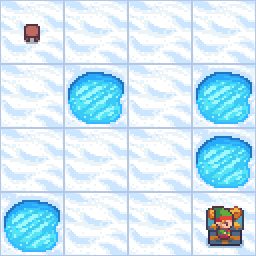

[[0.03727021 0.91959621 0.01115509 0.03197849]
 [0.36855635 0.13743033 0.2454354  0.24857792]
 [0.2316479  0.33163852 0.20238248 0.23433109]
 [0.26138545 0.23701653 0.25068049 0.25091753]
 [0.01833179 0.96286686 0.0051603  0.01364104]
 [0.25       0.25       0.25       0.25      ]
 [0.18129214 0.43904575 0.18129214 0.19836996]
 [0.25       0.25       0.25       0.25      ]
 [0.01942253 0.00510186 0.96377769 0.01169793]
 [0.02568621 0.51413156 0.45115866 0.00902357]
 [0.02186677 0.9506683  0.01206222 0.01540272]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.00822935 0.02503493 0.94696301 0.01977271]
 [0.01512236 0.03249781 0.9370827  0.01529713]
 [0.25       0.25       0.25       0.25      ]]


In [29]:

env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=False, map_name='4x4')
theta_0 = np.ones((16, 4))

for k in range(10000):
   observation, s_a_history, pi = reset(env, theta_0)
   run_once(env,pi,s_a_history,observation,show=False)
   if s_a_history[-1][0] == 15:
      theta_0 = update_theta(theta_0, pi, s_a_history)
observation, s_a_history, pi = reset(env, theta_0)
run_once(env,pi,s_a_history,observation,show=True)
env.close()
print(pi)


Value

In [14]:
def simple_convert_theta_to_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)
    return pi

In [15]:
def get_action(s, Q, espilon, pi):
    if np.random.rand() < espilon:
        return np.random.choice([0, 1, 2, 3], p=pi[s, :])
    else:
        return np.nanargmax(Q[s, :])

In [ ]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 15:
        Q[s, a] = Q[s, a] + eta * (r- Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q